In [ ]:
! pip install imbalanced-learn

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import pickle

In [ ]:
data = pd.read_json('/content/drive/MyDrive/Copy of published_jobs_for_job_category_extraction.json')

ValueError: ignored

In [ ]:
data.dropna(axis=0, inplace=True)
data.info()

In [ ]:
data['job_category'].nunique()

146

In [ ]:
JOB_CATEGORY_MIN = 250

In [ ]:
import pandas as pd

pd.set_option('display.max_rows', None)

dataset = pd.read_json('/content/drive/MyDrive/Copy of published_jobs_for_job_category_extraction.json')

dataset = dataset.iloc[:, [1,2]]

dataset.dropna(axis=0, inplace=True)

dataset_copy = dataset.copy()

counts_job_category = dataset_copy['job_category'].value_counts()

# dataset_after_minimum_category 

data = dataset_copy.loc[dataset_copy['job_category'].isin(counts_job_category.index[counts_job_category > JOB_CATEGORY_MIN])]

print(data.shape)


(42241, 2)


In [ ]:
data['job_category'].nunique()

50

In [ ]:
pd.set_option('display.max_rows', None)
data['job_category'].value_counts().to_frame()

,job_category
Marketing & Sales,8060
Teacher,3228
MBBS Doctor,1477
Software/Application Developer,1449
Assistant Manager,1372
Web Developer,1282
Project Officer,1245
Accounts Officer,1238
Project Manager,1213
Graphic Designer,1084


In [ ]:
# data.sort_values(['job_category', 'title'])

In [ ]:
sample_size = 280

In [ ]:
data = data.groupby('job_category').apply(lambda x: x.sample(sample_size) if len(x) > 280 else x.sample(len(x)))

In [ ]:
# data.size
len(data)

14000

In [ ]:
pd.set_option('display.max_rows', None)
data['job_category'].value_counts().to_frame()

,job_category
Project Officer,280
Production Officer,280
Information Technology Specialist,280
Manager (Accounting And Finance),280
Advisor,280
Security/Support Service,280
Finance Officer,280
MBBS Doctor,280
Medical Officer,280
Production Manager,280


In [ ]:
import re
import pandas as pd
import spacy
from bs4 import BeautifulSoup
from spacy.lang.en import STOP_WORDS

# stopwords = stopwords()


nlp = spacy.load('en_core_web_sm')


class EnglishPreprocessor:
    
    def replace_character(self, x_data):
      x_data = x_data.replace({'/': ' ', '&': ' ', ',': ' ', '$': ' ', '\n': ' ', '-':' '}, regex=True)
      return x_data

    def remove_space(self, x_data):
        return x_data.apply(lambda x: " ".join(x.split()))

    def remove_punctuations(self, x_data):
        return x_data.apply(lambda x: re.sub('[^A-Z a-z 0-9]+', '', x))

    def to_lower(self, x_data):
        return x_data.apply(lambda x: x.lower())

    def preprocess(self, x_data):
        # Replace Character
        x_data = self.replace_character(x_data)
        # Remove Punctuation and Special Character
        x_data = self.remove_punctuations(x_data)
        # Remove Multiple Space
        x_data = self.remove_space(x_data)
        # To_lower
        x_data = self.to_lower(x_data)

        return x_data

In [ ]:
# example of random oversampling to balance the class distribution
# from collections import Counter
# from sklearn.datasets import make_classification
# from imblearn.over_sampling import RandomOverSampler
# # define dataset
# X, y = make_classification(n_samples=10000, weights=[0.99], flip_y=0)
# # summarize class distribution
# print(Counter(y))
# # define oversampling strategy
# oversample = RandomOverSampler(sampling_strategy='minority')
# # fit and apply the transform
# X_over, y_over = oversample.fit_resample(X, y)
# # summarize class distribution
# print(Counter(y_over))

In [ ]:
x = data['title']
y = data['job_category']

In [ ]:
x= EnglishPreprocessor().preprocess(x)

In [ ]:
# from imblearn.over_sampling import RandomOverSampler
# oversample = RandomOverSampler(sampling_strategy='minority')
# x_re = x.reshape(-1, 1)
# X_over, y_over = oversample.fit_resample(x_re, y)

In [ ]:
# from collections import Counter
# print(Counter(y_over))

In [ ]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_y)

In [ ]:
dummy_y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, dummy_y, test_size=0.20, random_state=0)

AttributeError: ignored

In [ ]:
# x_test = EnglishPreprocessor().preprocess(x_test)

In [ ]:
# x_train = EnglishPreprocessor().preprocess(x_train)

In [ ]:
# x_train.dropna(axis=0, inplace=True)

In [ ]:
y_train.shape

(11200, 50)

In [ ]:
from keras.preprocessing import text, sequence

In [ ]:
tokenize = text.Tokenizer()

In [ ]:
tokenize.fit_on_texts(list(x))

In [ ]:
data = data.reset_index(level=0, drop=True)

In [ ]:
# data

In [ ]:
word_index=tokenize.word_index

In [ ]:
sentence_train1=tokenize.texts_to_sequences(x_train)

In [ ]:
Input_train=sequence.pad_sequences(sentence_train1,5)

In [ ]:
Input_train.shape

(11200, 5)

In [ ]:
len(word_index)

2777

In [ ]:
x_test = EnglishPreprocessor().preprocess(x_test)

In [ ]:
x_test.dropna(axis=0, inplace=True)

In [ ]:
sentence_train2 = tokenize.texts_to_sequences(x_test)

In [ ]:
Input_test=sequence.pad_sequences(sentence_train2,5)

In [ ]:
Input_test.shape

(2800, 5)

In [ ]:
# from imblearn.over_sampling import SMOTE, ADASYN
# from collections import Counter
# # x_re = x.reshape(-1, 1)
# X_resampled, y_resampled = SMOTE().fit_resample(Input_train, y_train)
# # print(sorted(Counter(y_resampled).items()))

In [ ]:
# X_resampled.shape

In [ ]:
# y_resampled.shape

In [ ]:
def Pretrained_embedding(emb_file):
  embedding_index={}
  with open(emb_file,errors ='ignore',encoding='utf-8') as f:
    for line in f:
      try:

        values=line.split()
        word=values[0]
        vector=np.asarray(values[1:],dtype="float32")
        embedding_index[word]=vector
      except Exception as e:
        continue
  return embedding_index


In [ ]:
embedding_index= Pretrained_embedding("/content/drive/MyDrive/Copy of glove.840B.300d.txt")

In [ ]:
# len(embedding_index)
embedding_index[1]

KeyError: ignored

In [ ]:
def embedding(word_index,embedding_ind):
    embedding_matrix=np.zeros((len(word_index)+1,300))
    for word,i in word_index.items():
        embedding_vector=embedding_ind.get(word)
        if embedding_vector is not None:
            embedding_matrix[i]=embedding_vector
    return embedding_matrix

In [ ]:
embedding_matrix = embedding(word_index, embedding_index)

In [ ]:
# len(embedding_matrix)
embedding_matrix.shape

(2778, 50)

In [ ]:
from sklearn.utils import class_weight

In [ ]:
class_weights = class_weight.compute_class_weight('balanced',np.unique(y),y)

In [ ]:
weight = {i : class_weights[i] for i in range(len(class_weights))}

In [ ]:
# weight

In [ ]:
# model1.add(Bidirectional(LSTM(100)))
# model1.add(Dropout(0.3))
# class_weight=weight

In [ ]:
from keras.layers import *

In [ ]:
ann = Sequential()

ann.add(tf.keras.layers.Embedding(
    input_dim= (len(word_index))+1, output_dim= 300,weights=[embedding_matrix],
     input_length=5,trainable=False,))

ann.add(Bidirectional(LSTM(50, activation='relu',dropout=0.5,recurrent_dropout=0.5,go_backwards=True)))
# ann.add(Bidirectional(LSTM(50, activation='tanh',go_backwards=True)))
# ann.add(Dense(units=5, activation='relu'))
# ann.add(Dropout(0.2))
ann.add(Dense(units=50, activation='relu'))
ann.add(Dropout(0.2))
# ann.add(Dense(units=20, activation='softmax'))
ann.add(Dense(50, activation='softmax'))
ann.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
checkpoint = [ModelCheckpoint('best_acc.h5', monitor="val_accuracy", verbose=1, save_best_only=True, mode='max')]

In [ ]:
estimator_1 = ann.fit(Input_train,y_train, epochs=50, batch_size=20, callbacks=checkpoint, validation_data=(Input_test,y_test))

Epoch 1/50
560/560 [==============================] - 8s 14ms/step - loss: 1.2917 - accuracy: 0.6528 - val_loss: 1.3554 - val_accuracy: 0.6504

Epoch 00001: val_accuracy improved from 0.64500 to 0.65036, saving model to best_acc.h5
Epoch 2/50
560/560 [==============================] - 8s 14ms/step - loss: 1.2550 - accuracy: 0.6619 - val_loss: 1.3420 - val_accuracy: 0.6500

Epoch 00002: val_accuracy did not improve from 0.65036
Epoch 3/50
560/560 [==============================] - 8s 14ms/step - loss: 1.2194 - accuracy: 0.6679 - val_loss: 1.3552 - val_accuracy: 0.6489

Epoch 00003: val_accuracy did not improve from 0.65036
Epoch 4/50
560/560 [==============================] - 8s 14ms/step - loss: 1.2117 - accuracy: 0.6682 - val_loss: 1.3534 - val_accuracy: 0.6586

Epoch 00004: val_accuracy improved from 0.65036 to 0.65857, saving model to best_acc.h5
Epoch 5/50
560/560 [==============================] - 8s 14ms/step - loss: 1.1876 - accuracy: 0.6746 - val_loss: 1.3689 - val_accuracy: 0.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
score = ann.evaluate(x_test, y_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

UnimplementedError: ignored

In [ ]:
y_pred = ann.predict(x_test)

In [ ]:
# Categorical Accuracy calculated using Keras' method
metric = tf.keras.metrics.CategoricalAccuracy()
metric.update_state(y_test,y_pred)
metric.result().numpy()

In [ ]:
# y_pred_proba = (y_pred > 0.5)

In [ ]:
# Categorical Accuracy calculated using Keras' method
metric = tf.keras.metrics.CategoricalAccuracy()
metric.update_state(y_test,y_pred_proba)
metric.result().numpy()

In [ ]:
report = classification_report(y_test, y_pred_proba)
print(report)

In [ ]:
import matplotlib.pyplot as plt

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


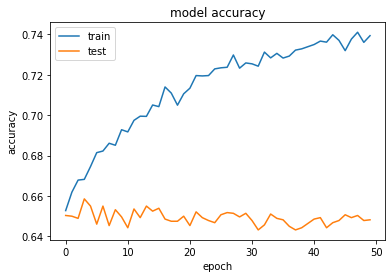

In [ ]:
print(estimator_1.history.keys())
# summarize history for accuracy
plt.plot(estimator_1.history['accuracy'])
plt.plot(estimator_1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

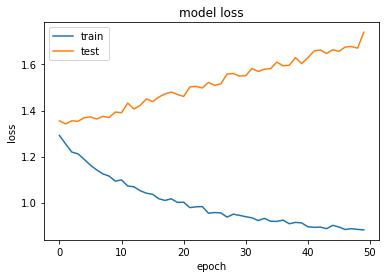

In [ ]:
# summarize history for loss
plt.plot(estimator_1.history['loss'])
plt.plot(estimator_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()